In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
import numpy as np
import pandas as pd
import torch
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(0)

# **Softmax Function**


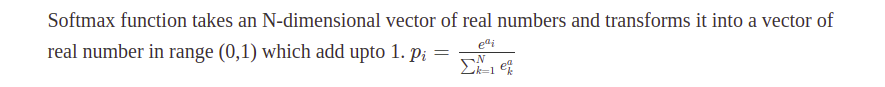

In [ ]:
def softmax(X):
    sum = np.sum(np.exp(X), axis=1, keepdims=True)
    z = np.exp(X)/sum
    return z

# **Softmax Derivative**

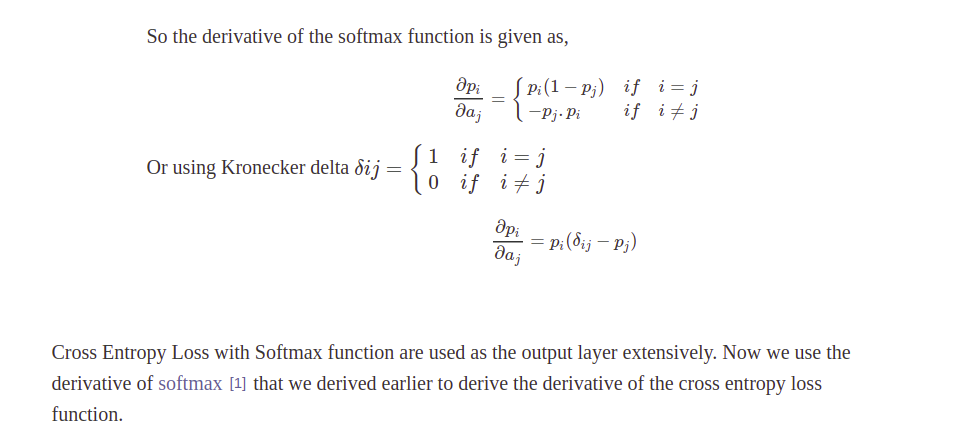

# **Derivatives of Cross Entropy Loss Function**

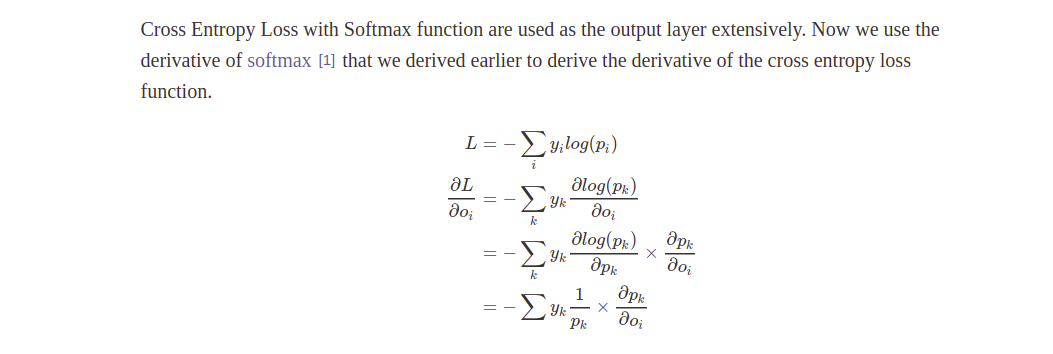

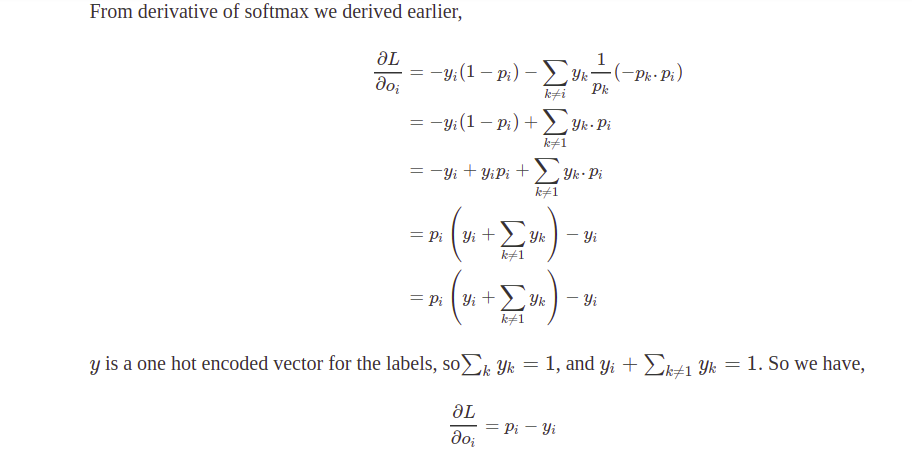

In [ ]:
def softmax_d(z,label):
    onehot_label = np.zeros_like(z)
    onehot_label[np.arange(z.shape[0]), label] = 1
    return z - onehot_label

   

In [ ]:
def create_network(input_layer_size,hidden_layer_size,output_layer_size):
    weight_h = np.random.normal(0,1,(input_layer_size,hidden_layer_size))
    weight_o = np.random.normal(0,1,(hidden_layer_size,output_layer_size))
    bias_h=np.random.normal(0,1,hidden_layer_size)
    bias_o=np.random.normal(0,1,output_layer_size)
    return weight_h,bias_h,weight_o,bias_o


# **Gradiant Of Matrix Product**

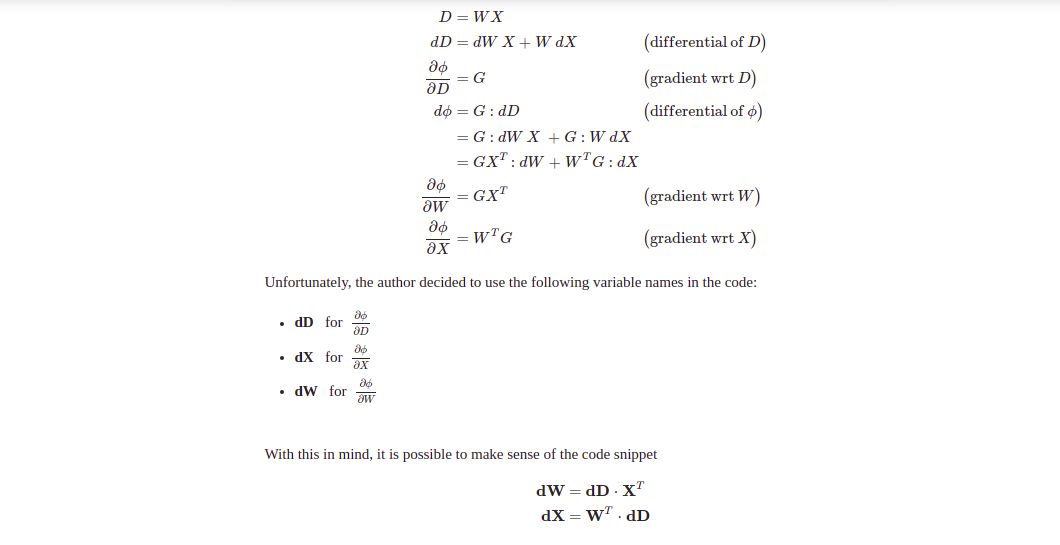

In [ ]:
def network(x,y,w1,b1,w2,b2,lr,reg,train=True):
    if train:
        #forward propogation
        y1=np.dot(x,w1)+b1
        relu=np.maximum(y1,0)
        y2=np.dot(relu,w2)+b2
        z=softmax(y2)
        loss=-np.log(z[range(z.shape[0]),y]).sum()+.5*reg*(np.sum(w1*w1)+np.sum(w2*w2))

        #backward propogation
        d_y2=softmax_d(z,y)
        d_w2=np.dot(relu.T,d_y2)+reg*w2
        d_b2=d_y2.sum()
        d_relu=np.dot(d_y2,w2.T)
        d_relu[relu<=0]=0
        d_y1=d_relu
        d_w1=np.dot(x.T,d_y1)+reg*w1
        d_b1=d_y1.sum()

        #weight update
        w2=w2-lr*d_w2
        b2=b2-lr*d_b2
        w1=w1-lr*d_w1
        b1=b1-lr*d_b1

        return w1,b1,w2,b2,loss
    else:
        #forward propogation
        y1=np.dot(x,w1)+b1
        relu=np.maximum(y1,0)
        y2=np.dot(relu,w2)+b2
        z=softmax(y2)
        loss=-np.log(z[range(z.shape[0]),y]).sum()+.5*reg*(np.sum(w1*w1)+np.sum(w2*w2))
    
        return z,loss
    

(150, 4)
epoch: 0  training_loss: 59.35  validation_loss: 37.79  validation accuracy: 0.19
epoch: 100  training_loss: 6.83  validation_loss: 14.13  validation accuracy: 0.89
epoch: 200  training_loss: 5.96  validation_loss: 12.02  validation accuracy: 0.91
epoch: 300  training_loss: 6.04  validation_loss: 11.15  validation accuracy: 0.93
epoch: 400  training_loss: 6.13  validation_loss: 10.55  validation accuracy: 0.93
epoch: 500  training_loss: 6.17  validation_loss: 10.19  validation accuracy: 0.93
epoch: 600  training_loss: 6.22  validation_loss: 9.80  validation accuracy: 0.93
epoch: 700  training_loss: 6.26  validation_loss: 9.47  validation accuracy: 0.93
epoch: 800  training_loss: 6.29  validation_loss: 9.20  validation accuracy: 0.93
epoch: 900  training_loss: 5.93  validation_loss: 6.57  validation accuracy: 0.94
epoch: 1000  training_loss: 5.73  validation_loss: 6.44  validation accuracy: 0.95
epoch: 1100  training_loss: 5.51  validation_loss: 6.21  validation accuracy: 0.95


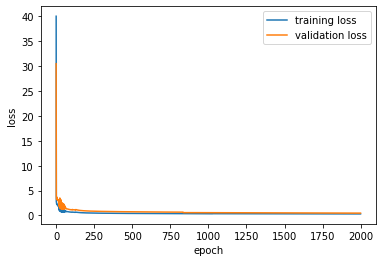

In [ ]:
def train_network(x,y,weight_h,bias_h,weight_o,bias_o,lr,reg,fold,n_epoch):
    train_loss_list,val_loss_list = [],[]
    for epoch in range(n_epoch):
        train_loss,val_loss=0,0
        pred_list,val_list=[],[]
        for k in range(fold):
            val_index=range(int(k*x.shape[0]/fold),int((k+1)*x.shape[0]/fold))
            train_index=[i for i in range(0,x.shape[0]) if i not in val_index]
            train_x,train_y=x[train_index,:],y[train_index]
            val_x,val_y=x[val_index,:],y[val_index]
            
            weight_h,bias_h,weight_o,bias_o,cost = network(train_x,train_y,weight_h,bias_h,weight_o,bias_o,lr,reg)
            val_pred,val_cost=network(val_x,val_y,weight_h,bias_h,weight_o,bias_o,lr,reg,False)
            
            pred=np.argmax(val_pred,axis=1)
            train_loss+=cost/train_x.shape[0]
            val_loss+=val_cost/val_x.shape[0]
            pred_list.extend(pred.tolist())
            val_list.extend(val_y.tolist())
            
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        accuracy=(np.array(pred_list)==np.array(val_list)).sum()/len(val_list)

        if epoch%100==0:
            print("epoch: {:d}  training_loss: {:.2f}  validation_loss: {:.2f}  validation accuracy: {:.2f}".format(
                epoch,cost,val_cost,accuracy))
    
    plt.plot(range(epoch+1),train_loss_list,label="training loss")        
    plt.plot(range(epoch+1),val_loss_list,label="validation loss")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    return weight_h,bias_h,weight_o,bias_o

x = iris.data
y = iris.target
print(x.shape)

hidden_layer_size = 2
output_layer_size = 3
lr = 0.001
reg=0
n_epoch=2000
n_fold=5
weight_h,bias_h,weight_o,bias_o  = create_network(x.shape[1],hidden_layer_size,output_layer_size) # Define network
weight_h,bias_h,weight_o,bias_o = train_network(x,y,weight_h,bias_h,weight_o,bias_o,lr,reg,n_fold,n_epoch) # train network


In [ ]:
test_pred,_=network(x,y,weight_h,bias_h,weight_o,bias_o,lr,reg,False)
print(np.argmax(test_pred,axis=1))      

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
